<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/AtomVisionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example to run [AtomVision](https://github.com/usnistgov/atomvision)

AtomVision is a deep learning package to perform various operations on image data including segmentation and classification of images.

**For faster computing, change notebook hardware to "GPU". Edit > Notebook Settings > Hardware Accelerator > GPU**

# Find more detail about AtomVision in: https://pubs.acs.org/doi/10.1021/acs.jcim.2c01533

# Table of Contents
1. Install [AtomVision](https://github.com/usnistgov/atomvision) package
2. Generating STEM image with convolution approximation: graphene example
3. Train an autoencoder
4. Train a Generative Adversarial Network
5. Train DenseNet classification model on JARVIS-DFT 2D STEM image dataset
6. Generate Graph over Atomistic Image
7. Train ALIGNN based classification model on JARVIS-DFT 2D STEM image dataset


# Get the repository and install

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:17
🔁 Restarting kernel...


In [3]:
# %%time

# !conda install alignn dgl=2.1.0 pytorch torchvision torchaudio pytorch-cuda -c pytorch -c nvidia --quiet -y


In [1]:
!pip install  git+https://github.com/usnistgov/atomvision.git@develop

  Cloning https://github.com/usnistgov/atomvision.git (to revision develop) to /tmp/pip-req-build-kftx0abg
  Running command git clone --filter=blob:none --quiet https://github.com/usnistgov/atomvision.git /tmp/pip-req-build-kftx0abg
  Running command git checkout -b develop --track origin/develop
  Switched to a new branch 'develop'
  Branch 'develop' set up to track remote branch 'develop' from 'origin'.
  Resolved https://github.com/usnistgov/atomvision.git to commit dbe5cb3321ef2a2b9ee806640501ba959596398c
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 998.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.0 MB/s eta 0:00:00
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached typer-0.12.4-py

In [2]:
# pip install Pillow==9.0.0

In [6]:
!conda install ipykernel

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ipykernel


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    asttokens-2.4.1            |     pyhd8ed1ab_0          28 KB  conda-forge
    ca-certificates-2024.7.4   |       hbcca054_0         151 KB  conda-forge
    certifi-2024.7.4           |     pyhd8ed1ab_0         156 KB  conda-forge
    comm-0.2.2                 |     pyhd8ed1ab_0          12 KB  conda-forge
    debugpy-1.8.5              |  py310hea249c9_0         1.9 MB  conda-forge
    decorator-5.1.1            |     pyhd8ed1ab_0          12 KB  conda-forge
    excepti

In [4]:
import os
!pwd
os.chdir('/content')
# Clone ALIGNN repo to get example folder
if not os.path.exists('atomvision'):
  !git clone https://github.com/usnistgov/atomvision.git
os.chdir('atomvision')

/content
Cloning into 'atomvision'...
remote: Enumerating objects: 2014, done.
remote: Counting objects: 100% (2010/2010), done.
remote: Compressing objects: 100% (1650/1650), done.
remote: Total 2014 (delta 374), reused 1942 (delta 340), pack-reused 4 (from 1)
Receiving objects: 100% (2014/2014), 161.67 MiB | 21.38 MiB/s, done.
Resolving deltas: 100% (374/374), done.


Generating STEM image with convolution approximation: graphene example

In [7]:
!python atomvision/scripts/stem_conv.py --file_path atomvision/tests/POSCAR --output_path Graphene_STEM.png

/usr/local/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(


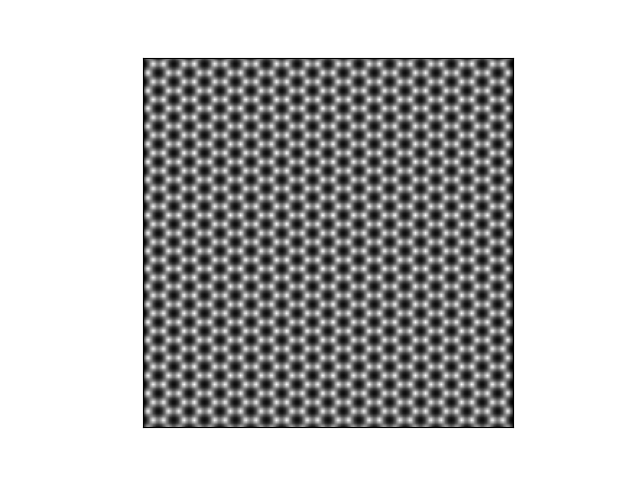

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
Image('Graphene_STEM.png')

Autoencoder

In [9]:
!python atomvision/scripts/train_autoencoder.py --train_folder atomvision/sample_data/test_folder --test_folder atomvision/sample_data/test_folder --epochs 10

Using feature size 1120
/usr/local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Epoch, train_loss, val_loss 1 4.654457354711162 0.05866549412409464
Epoch, train_loss, val_loss 2 0.05318795434302754 0.04749429474274317
Epoch, train_loss, val_loss 3 0.04611853634317716 0.044296195109685264
Epoch, train_loss, val_loss 4 0.043677752630578145 0.042563896626234055
Epoch, train_loss, val_loss 5 0.04261621211965879 0.041838823093308344
Epoch, train_loss, val_loss 6 0.0413127520845996 0.04092092108395365
Epoch, train_loss, val_loss 7 0.04006240848037931 0.0400404901140266
Epoch, trai

Generative Adversarial Network

In [10]:
!python atomvision/scripts/train_gan.py --dataset_path atomvision/sample_data/test_folder/0 --epochs 2

6 2
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100% 548M/548M [00:03<00:00, 179MB/s]
Training Epoch 0 : 100% 6/6 [00:09<00:00,  1.58s/it, disc_loss=0.353, gen_loss=0.943]
Testing Epoch 0 : 100% 2/2 [00:01<00:00,  1.36it/s, disc_loss=0.377, gen_loss=0.888]
Training Epoch 1 : 100% 6/6 [00:07<00:00,  1.24s/it, disc_loss=0.0593, gen_loss=0.821]
Testing Epoch 1 : 100% 2/2 [00:01<00:00,  1.73it/s, disc_loss=0.362, gen_loss=0.847]


# Example Plots for Each Image Class

The convolutional neural network classifies the structures into the 5 categories of STM images. Here, we print out example images from each category to look at their shared characteristics. Each image is labelled here with its composition and space group.

In [11]:
import os

#List the class sub-folders generated by the neural network
test_folder = "atomvision/sample_data/test_folder/"

os.listdir(test_folder)

['3', '4', '2', '1', '0']

In [12]:
#Load the JARVIS-DFT 2D Dataset to maatch JARVIS-ID to spacegroup
from jarvis.core.atoms import Atoms
from jarvis.db.figshare import data
dft_2d = data("dft_2d")

Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815705


100%|██████████| 8.39M/8.39M [00:01<00:00, 6.80MiB/s]


Loading the zipfile...
Loading completed.


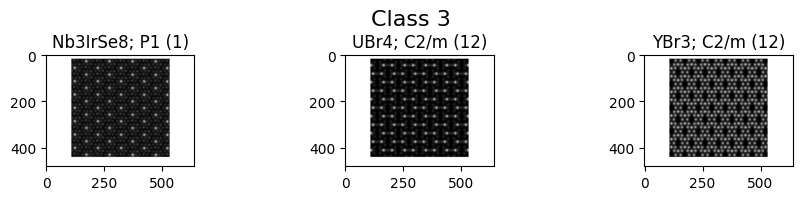

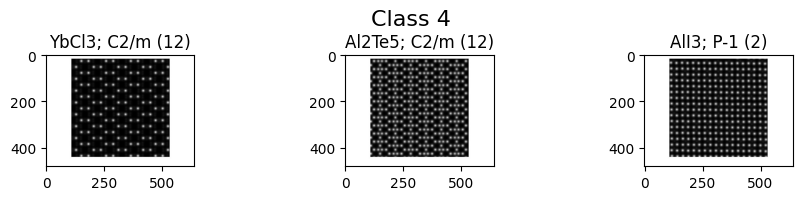

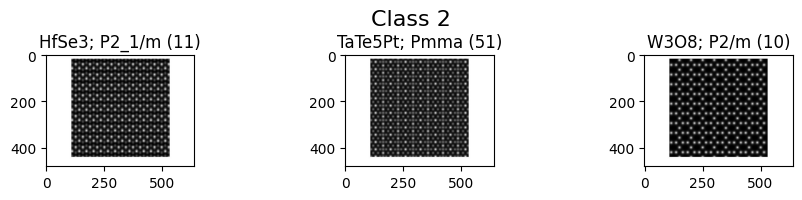

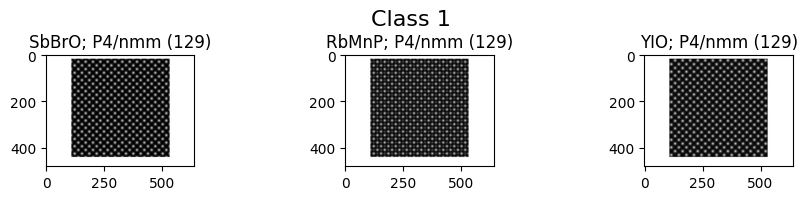

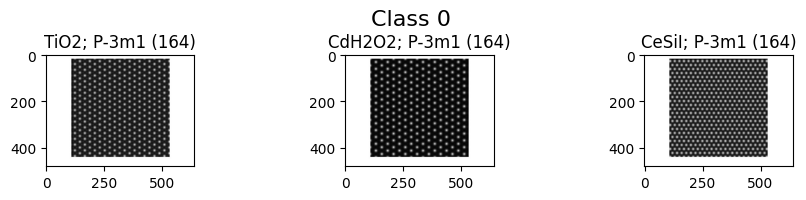

In [13]:
%matplotlib inline
for cls in os.listdir(test_folder):
  fig, ax = plt.subplots(1,3, figsize = (9,2))
  fig.tight_layout(w_pad = 2)
  fig.subplots_adjust(top=0.75)
  fig.suptitle('Class {}'.format(cls), fontsize=16)
  i = 1
  for img in os.listdir(test_folder + cls)[:3]:
    plt.subplot(1,3,i)
    plt.imshow(plt.imread(test_folder + cls + "/" + img))
    start = img.find('JVASP')
    end = img.find('.jpg')
    jid = img[start:end]
    entry = next(j for j in dft_2d if j["jid"] == jid)
    atoms = Atoms.from_dict(entry["atoms"])
    comp = atoms.composition.reduced_formula
    spg = atoms.spacegroup()
    plt.title("{}; {}".format(comp, spg)) #Label by composition and space group.
    i = i+1
plt.show()

# Train DenseNet pretrained model on JARVIS-DFT 2D materials' STEM images generated with convolution approximation

Datasets can be generated with STM/STEM sections of the data folder with generate_data.py script or pre-populated image datasets can be downloaded with 'download.py`. We create two folders ``train_folder``, ``test_folder`` with sub-folders ``0,1,2,3,4,...`` for individual classes and they contain images for these classes such that the train-test splits have a proportionate number of images. An example for using pre-trained densenet on STEM JARVIS-DFT 2D dataset is given below. Change ``train_folder`` and ``test_folder`` paths in order to use a different dataset.


The classification model chosen here is the DenseNet (reference [paper](https://paperswithcode.com/method/dense-block)), which include "dense blocks", modules in which all the layers of the neural network are directly connected to one another.

**Try Modifying**
1. Other classification models (such as [ResNet](https://paperswithcode.com/method/resnet) or [VGG](https://paperswithcode.com/method/vgg)) can be trialled as well by substitute (using ``model_name`` tag)
2. Number of training epochs (using ``epochs`` tag)
3. Batch size (using ``batch_size`` tag)
4. Loss function (using ``criterion`` tag)

This example shows how to classify 2D-lattice (5 Bravais classes) for 2D-materials STM/STEM images.

We will use imagessample_data folder. It was generated with generate_stem.py script. There are two folders train_folder, test_folder with sub-folders 0,1,2,3,4,... for individual classes and they contain images for these classes.
This is a smaller version of the entire dataset, which is available at: https://doi.org/10.6084/m9.figshare.16788268

In [18]:
pip install pytorch-ignite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.7/312.7 kB 14.2 MB/s eta 0:00:00


In [20]:
pip install scikit-image

In [19]:
!python atomvision/scripts/train_classifier_cnn.py --model densenet --train_folder atomvision/sample_data/test_folder --test_folder atomvision/sample_data/test_folder --epochs 5 --batch_size 16

/usr/local/lib/python3.10/site-packages/ignite/handlers/checkpoint.py:16: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer
Traceback (most recent call last):
  File "/content/atomvision/atomvision/scripts/train_classifier_cnn.py", line 34, in <module>
    from skimage.future.graph import rag_mean_color
ModuleNotFoundError: No module named 'skimage.future.graph'


In [22]:
from skimage.graph import rag_mean_color

In [ ]:
#Show any output files that have been generated
!ls

Acc.png			    CM.png	       Loss.png
ae.pt			    CODEMETA.yaml      prediction_results_test_set.csv
atomvision		    Graphene_STEM.png  README.md
atomvision_checkpoint_4.pt  history.json       saved_models
atomvision_checkpoint_5.pt  images	       setup.py
cm.json			    LICENSE.md	       test.png


## Show Performance Metrics Using Test Set

Metrics used to train the classifier include the _accuracy_, _loss_, and _confusion matrix_. Each of which is discussed and plotted out below.

**Accuracy versus Training Epochs**

The classification accuracy is calculated from the relative number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN). It equals the number of correct predictions divided by the total number of predictions.

$\mathrm{Accuracy} = \frac{(TP + TN)}{(TP + FN + FP + TN)}$

([], [])

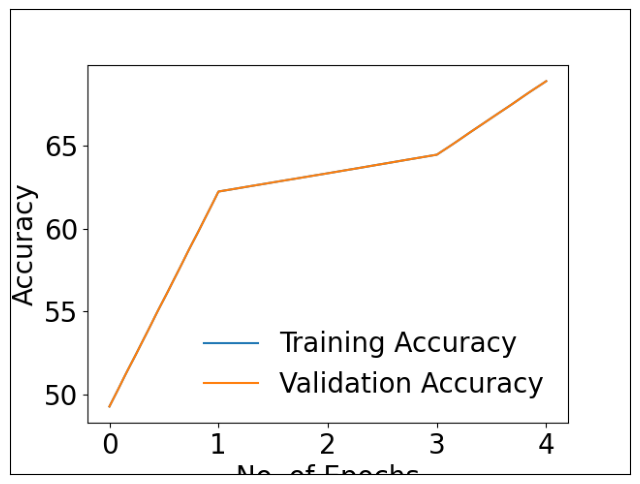

In [ ]:
import matplotlib.image as mpimg
plt.figure(figsize = (8,8))
img = mpimg.imread('Acc.png')
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])

**Loss versus Training Epochs**

The default loss function is the negative log likelihood, which should be minimzed in order to have the highest probabilities associated with correctly labelled samples.

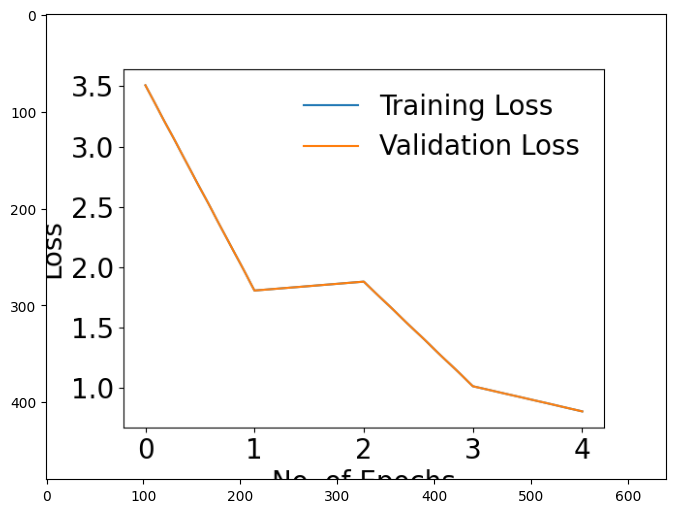

In [ ]:
plt.figure(figsize = (8,8))
img = mpimg.imread('Loss.png')
imgplot = plt.imshow(img)

**Confusion Matrix**

The confusion matrix provides a visual representation of the performance of the classification model. The ``true`` labels are shown along the vertical axis, while the ``predicted`` labels are given along the horizontal axis. Any sample that lies along the diagonal is correctly classified, while off-diagonal samples are incorrectly classified.

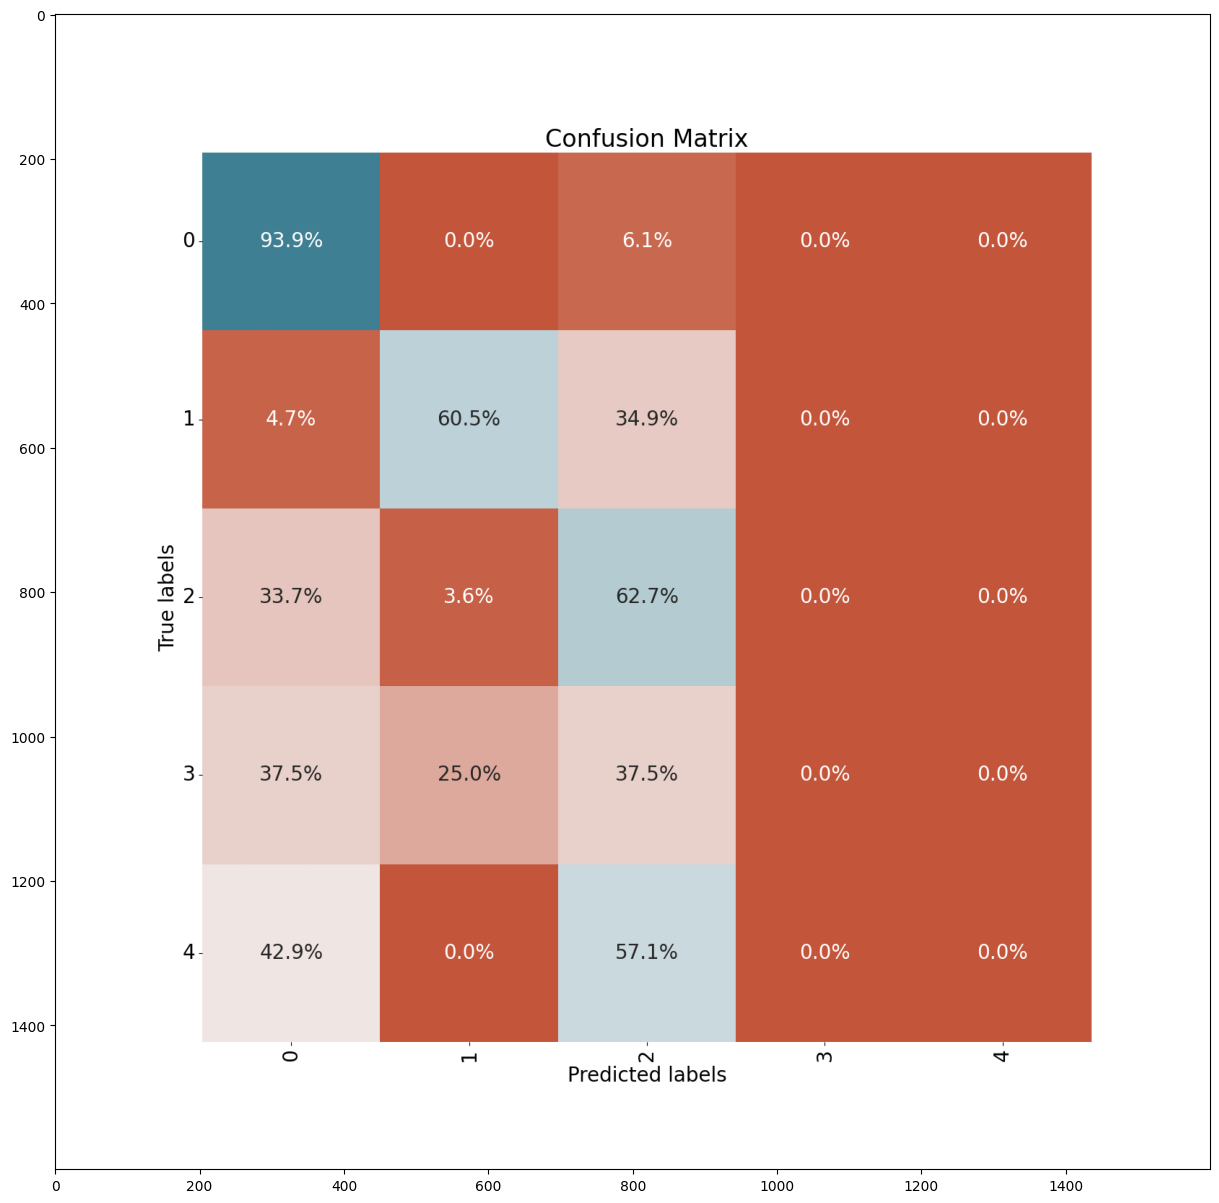

In [ ]:
plt.figure(figsize = (15,15))
img = mpimg.imread('CM.png')
imgplot = plt.imshow(img)

# Graph Generation over Atomistic Image

In order to apply a graph neural network to image analysis tasks, we first demonstrate how to produce a graph representation of the atomistic image. In this example, a blob detection algorithm is first used to localize atoms. The blobs become the nodes of the graph, where the node features coorespond to blob attributes like the radius, maximum intensity, and mean intensity values within the blob. Next, the Digitital Graph Library (``dgl``) package is used to construct a graph by connecting neighboring nodes with edges up to a cut-off radius that can be modified by the user. The edges represent bond vectors between the atoms. An additional line graph is also generated, where the nodes represent bond vector and the edges represent triplets of atoms, or bond vectors.

Below, we show an exaple graph construction with the atomistic graph overlaid on an example simulated STEM image.

In [ ]:
# !pip install --pre dgl -f https://data.dgl.ai/wheels/cu117/repo.html
# !pip install --pre dglgo -f https://data.dgl.ai/wheels-test/repo.html
# !pip install alignn

In [ ]:
from atomvision.scripts.image_to_graph import *

img = cv2.imread(test_folder + "0/JVASP-13509.jpg", cv2.IMREAD_GRAYSCALE)
print(img.shape)

#Cropping image before graph generation
crp_img = crop_image(img, [120,120,200,200])

# Get blob (atom) locations and attributes
blobs_list = get_blob_positions(crp_img, plot=True)

# Generate atomistic graph and line graph
g, lg = blob_list_to_graph(crp_img, blobs_list, plot=True)

(480, 640)


/usr/local/lib/python3.10/dist-packages/dgl/backend/pytorch/tensor.py:52: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return th.as_tensor(data, dtype=dtype)


In [ ]:
from atomvision.scripts.train_classifier_alignn import main
from jarvis.db.figshare import data
import pandas as pd
from jarvis.core.atoms import Atoms
from jarvis.core.lattice import get_2d_lattice

dft_2d = pd.DataFrame(data("dft_2d"))
c2_db = pd.DataFrame(data("c2db"))
twod_matp = pd.DataFrame(data("twod_matpd"))
c2_db["spg_formula"] = c2_db["atoms"].apply(
    lambda x: (Atoms.from_dict(x)).composition.reduced_formula
    + "_"
    + str((Atoms.from_dict(x)).get_spacegroup[0])
)
twod_matp["spg_formula"] = twod_matp["atoms"].apply(
    lambda x: (Atoms.from_dict(x)).composition.reduced_formula
    + "_"
    + str((Atoms.from_dict(x)).get_spacegroup[0])
)
twod_matp["id"] = twod_matp["material_id"]
dft_2d["spg_formula"] = dft_2d["atoms"].apply(
    lambda x: (Atoms.from_dict(x)).composition.reduced_formula
    + "_"
    + str((Atoms.from_dict(x)).get_spacegroup[0])
)
dft_2d["id"] = dft_2d["jid"]
df1 = (
    pd.concat([dft_2d, c2_db, twod_matp])
    .drop_duplicates("spg_formula")
    .reset_index(drop=True)
)
print(len(dft_2d) + len(c2_db) + len(twod_matp))
df1["lat"] = df1["atoms"].apply(lambda x: get_2d_lattice(x)[1])

info = []
for i,ii in df1.iterrows():
   mem={}
   mem['jid'] =ii['id']
   mem['atoms']=ii['atoms']
   info.append(mem)
info=info[0:400]
print (len(info))


training.output_feats 1
training.output_feats 1
Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815705
Loading the zipfile...
Loading completed.
Obtaining C2DB dataset 3.5k...
Reference:https://iopscience.iop.org/article/10.1088/2053-1583/aacfc1


100%|██████████| 5.52M/5.52M [00:00<00:00, 6.50MiB/s]


Loading the zipfile...
Loading completed.
Obtaining 2DMatPedia dataset 6k...
Reference:https://www.nature.com/articles/s41597-019-0097-3


100%|██████████| 1.56M/1.56M [00:00<00:00, 2.51MiB/s]


Loading the zipfile...
Loading completed.
10974
400


In [ ]:
from jarvis.db.jsonutils import dumpjson
c = {
    "training": {
        "batch_size": 32,
        "epochs": 3,
        "learning_rate": 0.001,
        "learning_rate_finetune": 3e-05
    }
}
dumpjson(data=c,filename="config_alignn.json")


In [ ]:
#might have a bug
# main(info=info,config_file='config_alignn.json',test_size=0.25)